In [ ]:
1+1

2

# Solution: Classifying Brain Tumor using CNN on Tensorflow 2.x

##Pre-process  the Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### <b> Load the  Dataset

#### <b> Unzip the  Data

In [ ]:
!unzip /content/drive/MyDrive/Colab/BrainTumor.zip -d /content/drive/MyDrive/Colab

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab/Brain_Tumor_Datasets/train/no/no1385.jpg  
  inflating: /content/drive/MyDrive/Colab/Brain_Tumor_Datasets/train/no/no1388.jpg  
  inflating: /content/drive/MyDrive/Colab/Brain_Tumor_Datasets/train/no/no139.jpg  
  inflating: /content/drive/MyDrive/Colab/Brain_Tumor_Datasets/train/no/no1390.jpg  
  inflating: /content/drive/MyDrive/Colab/Brain_Tumor_Datasets/train/no/no1391.jpg  
  inflating: /content/drive/MyDrive/Colab/Brain_Tumor_Datasets/train/no/no1393.jpg  
  inflating: /content/drive/MyDrive/Colab/Brain_Tumor_Datasets/train/no/no1394.jpg  
  inflating: /content/drive/MyDrive/Colab/Brain_Tumor_Datasets/train/no/no1395.jpg  
  inflating: /content/drive/MyDrive/Colab/Brain_Tumor_Datasets/train/no/no1398.jpg  
  inflating: /content/drive/MyDrive/Colab/Brain_Tumor_Datasets/train/no/no1399.jpg  
  inflating: /content/drive/MyDrive/Colab/Brain_Tumor_Datasets/train/no/no140.jpg  
  inflating: /co

#### <b> Visualize the  Data

Populating the interactive namespace from numpy and matplotlib


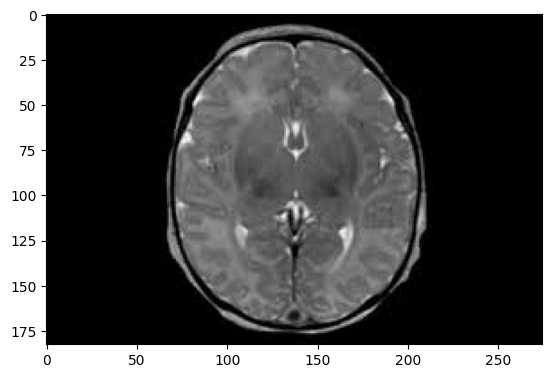

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/Colab/Brain_Tumor_Datasets/test/no/12 no.jpg')
imgplot = plt.imshow(img)
plt.show()


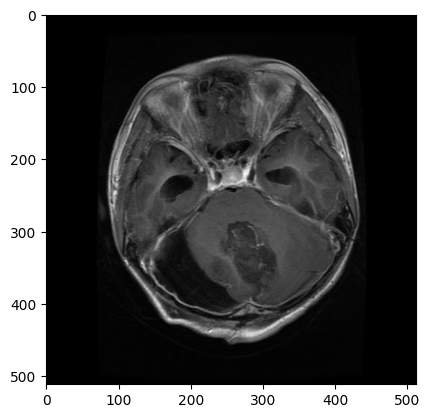

In [ ]:
img=mpimg.imread('/content/drive/MyDrive/Colab/Brain_Tumor_Datasets/test/yes/Te-glTr_0000.jpg')
imgplot = plt.imshow(img)
plt.show()


##  Import Libraries

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#####Check the TensorFlow version

In [ ]:
print(tensorflow.__version__)

2.15.0


## Designing the Model

#### <b> Initialize the parameters

In [ ]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/drive/MyDrive/Colab/Brain_Tumor_Datasets/train"
validation_data_dir=r"/content/drive/MyDrive/Colab/Brain_Tumor_Datasets/test"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

#### <b> Check the shape of the image

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)


#### <b> Generate Images to train the model

In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1. /255)


train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['yes','no'])
#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)


validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')
#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)



Found 7012 images belonging to 2 classes.
Found 1752 images belonging to 2 classes.


####**Visual Representation of ImageDataGenerator**

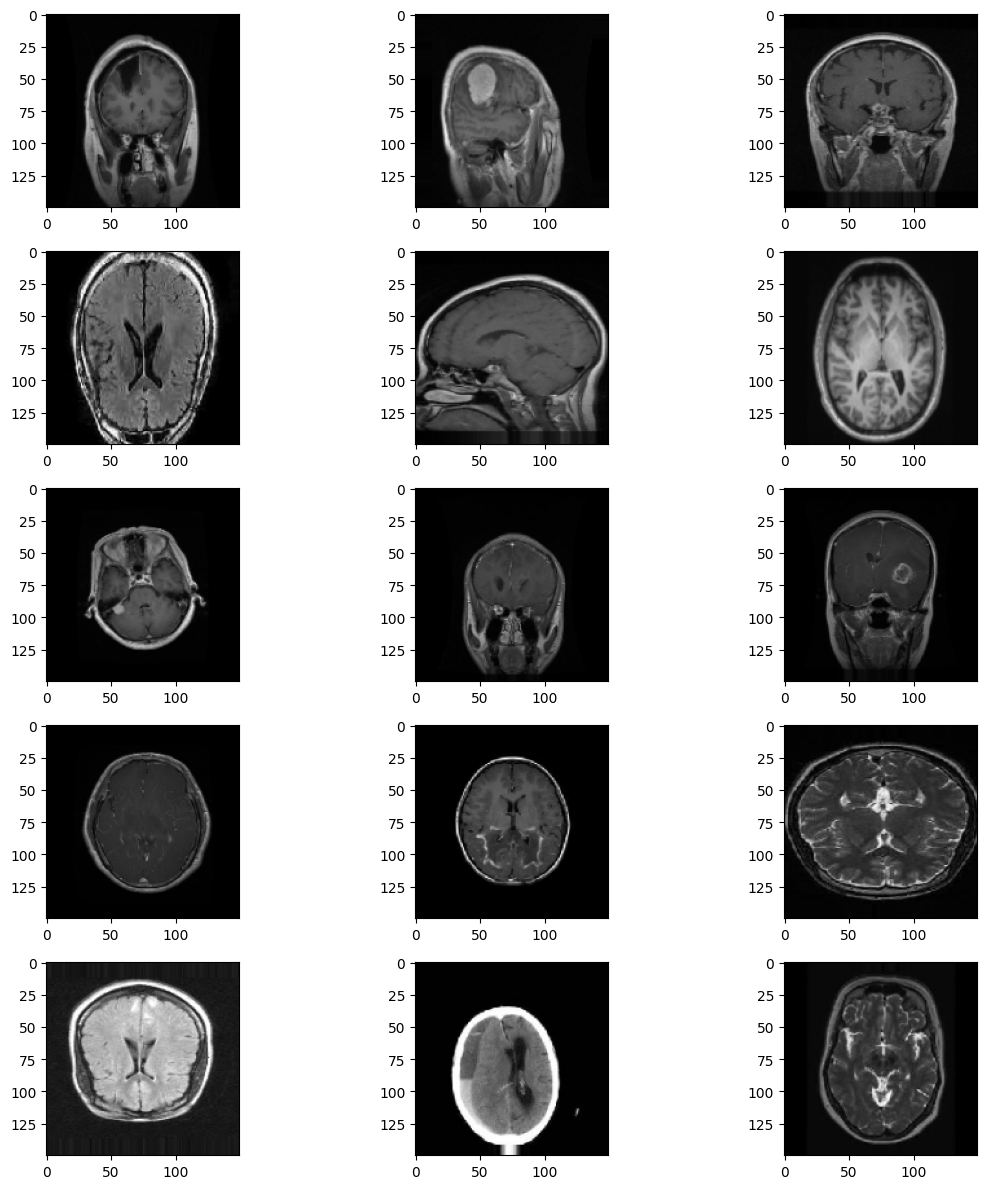

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### <b> Build the basic CNN model 0

####<b> Layers in CNN:


In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
#This class allows to create convolutional neural network to extract feature from the images

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling2D helps to reduce the size of the data

model.add(Flatten())#Converts multi dimensional array to 1D channel
model.add(Dense(64)) #64 neurons with 3*3 filter
#Numbers of output nodes in the hidden layer
model.add(Activation('relu'))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid')) #sigmoid activation function
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                      

#### <b> Compile the basic CNN model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                      

#### <b> Fit the basic CNN model

In [ ]:
training = model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

<ipython-input-20-f6f9d28e26eb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 0.9511 - accuracy: 0.7740

100/100 [==============================] - 153s 2s/step - loss: 0.9511 - accuracy: 0.7740 - val_loss: 2.8912 - val_accuracy: 0.0896
Epoch 2/20
100/100 [==============================] - 104s 1s/step - loss: 0.2726 - accuracy: 0.8956
Epoch 3/20
100/100 [==============================] - 106s 1s/step - loss: 0.2065 - accuracy: 0.9185
Epoch 4/20
100/100 [==============================] - 104s 1s/step - loss: 0.2071 - accuracy: 0.9177
Epoch 5/20
100/100 [==============================] - 119s 1s/step - loss: 0.1668 - accuracy: 0.9415
Epoch 6/20
100/100 [==============================] - 104s 1s/step - loss: 0.1654 - accuracy: 0.9410
Epoch 7/20
100/100 [==============================] - 102s 1s/step - loss: 0.1535 - accuracy: 0.9460
Epoch 8/20
100/100 [==============================] - 104s 1s/step - loss: 0.1532 - accuracy: 0.9410
Epoch 9/20
100/100 [==============================] - 101s 1s/step - loss: 0.1557 - accuracy: 0.9425
Epoch 10/20
100/100 [==============================] - 112s 

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


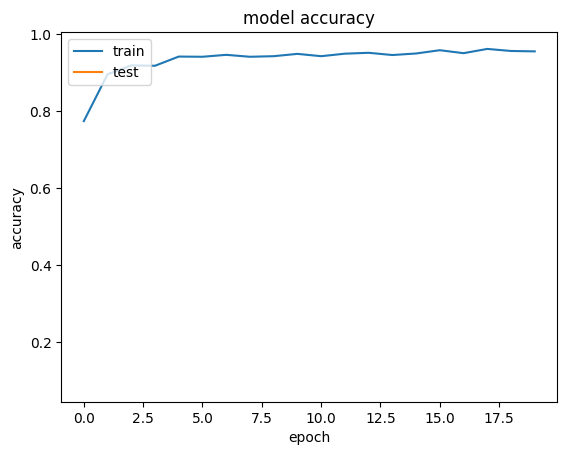

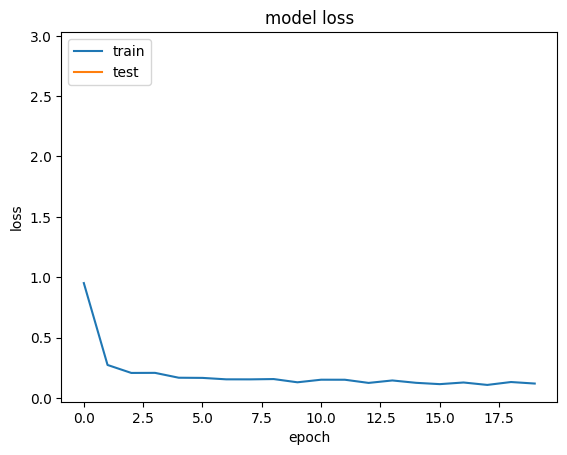

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


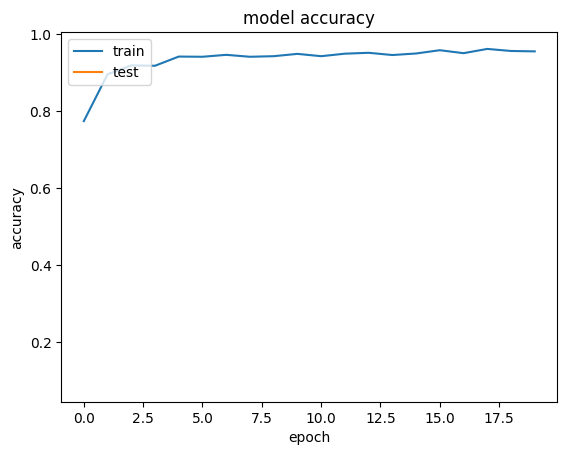

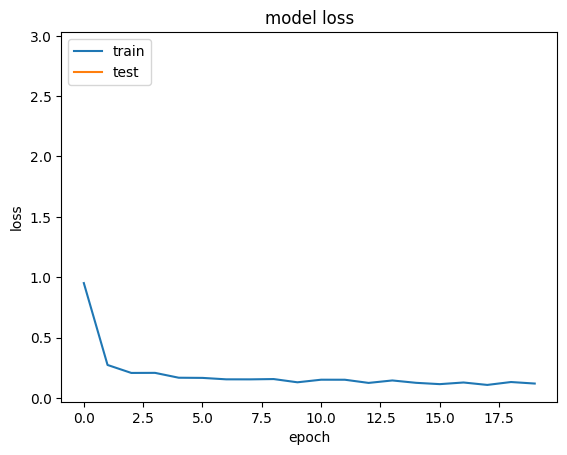

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


1/1 [==============================] - 0s 120ms/step
[[1.]]
Prediction:  no


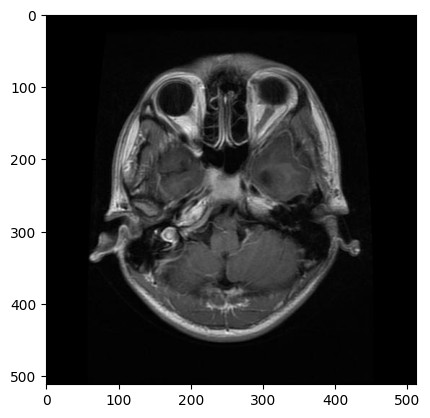

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/drive/MyDrive/Colab/Brain_Tumor_Datasets/test/yes/Te-glTr_0003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="no"
else:
    prediction ="yes"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/Colab/Brain_Tumor_Datasets/test/yes/Te-glTr_0003.jpg')
imgplot = plt.imshow(img)
plt.show()


####<b> Predict the image


1/1 [==============================] - 0s 42ms/step
[[1.]]
Prediction:  no


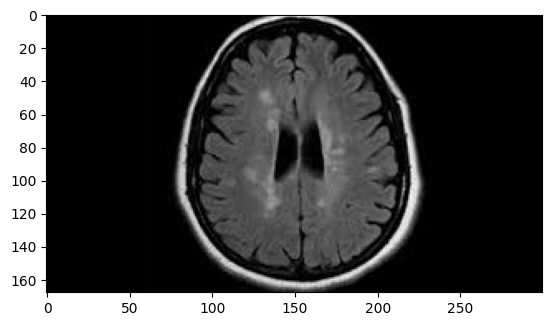

In [ ]:
img_pred = image.load_img("/content/drive/MyDrive/Colab/Brain_Tumor_Datasets/test/no/13 no.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="no"
else:
    prediction ="yes"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/Colab/Brain_Tumor_Datasets/test/no/13 no.jpg')
imgplot = plt.imshow(img)
plt.show()
